In [2]:
#Imports necessários

import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.style.use("seaborn-v0_8")
#Estilo

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (17,8)


[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open    Volume
Ticker          ^GSPC      ^GSPC      ^GSPC      ^GSPC     ^GSPC
Date                                                            
1970-01-02  93.000000  93.540001  91.790001  92.059998   8050000
1970-01-05  93.459999  94.250000  92.529999  93.000000  11490000
1970-01-06  92.820000  93.809998  92.129997  93.459999  11460000
1970-01-07  92.629997  93.379997  91.930000  92.820000  10010000
1970-01-08  92.680000  93.470001  91.989998  92.629997  10670000
1970-01-09  92.400002  93.250000  91.820000  92.680000   9380000
1970-01-12  91.699997  92.669998  91.199997  92.400002   8900000
1970-01-13  91.919998  92.610001  90.989998  91.699997   9870000
1970-01-14  91.650002  92.400002  90.879997  91.919998  10380000
1970-01-15  91.680000  92.349998  90.730003  91.650002  11120000
1970-01-16  90.919998  92.489998  90.360001  91.680000  11940000
1970-01-19  89.650002  90.720001  89.139999  90.720001   9500000
1970-01-20  89.830002  90

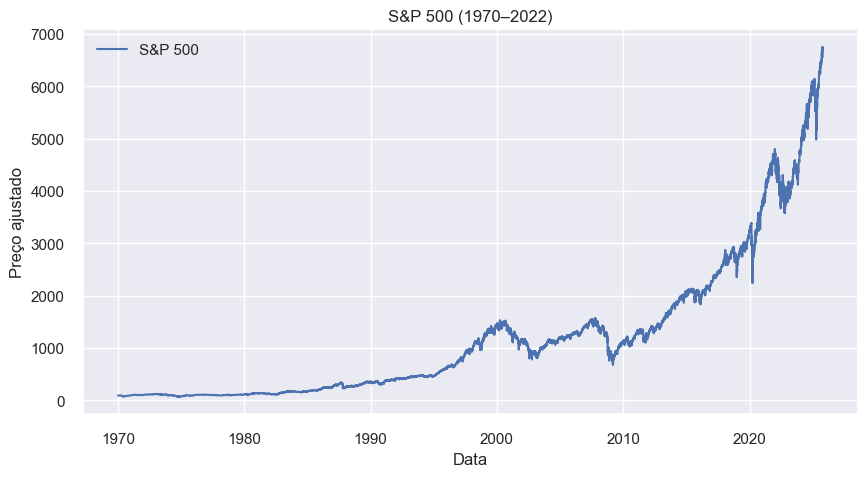

In [3]:
#Importando dados do SP&500 de 1970 até 2025
sp = yf.download("^GSPC", start="1970-01-01", end="2025-10-12", auto_adjust=True)

#Verificando o DataFrame Multiindex
print(sp.head(15))
print(sp.columns)

#Tirando valores inconsistentes
sp = sp["Close"].dropna()

#Plotando o gráfico da série histórica
plt.figure(figsize=(10,5))
plt.plot(sp, label="S&P 500")
plt.title("S&P 500 (1970–2022)")
plt.xlabel("Data")
plt.ylabel("Preço ajustado")
plt.legend()
plt.show()




[*********************100%***********************]  1 of 1 completed

Ticker           ^GSPC
Date                  
1990-01-02  359.690002
1990-01-03  358.760010
1990-01-04  355.670013
1990-01-05  352.200012
1990-01-08  353.790009
1990-01-09  349.619995
1990-01-10  347.309998
1990-01-11  348.529999
1990-01-12  339.929993
1990-01-15  337.000000
1990-01-16  340.750000
1990-01-17  337.399994
1990-01-18  338.190002
1990-01-19  339.149994
1990-01-22  330.380005
Index(['^GSPC'], dtype='object', name='Ticker')


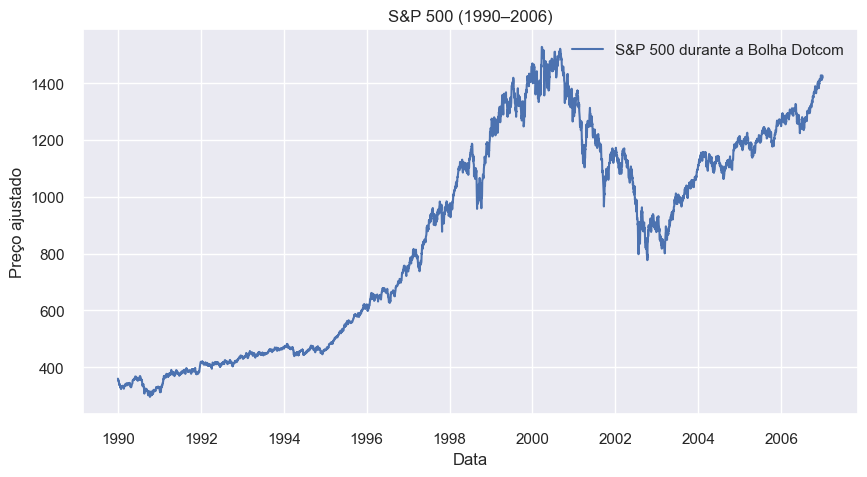

In [4]:
#Importando os dados do periodo de 1990 até 2006, a literatura economica indica que a bolha começou em meados dos anos 90 e foi até 2004
#Assim, pegamos esses dados para verificar o movimento que as pessoas viram na época.
sp = yf.download("^GSPC", start="1990-01-01", end="2006-12-31", auto_adjust=True)

#Retirando dados inconsistentes.
sp = sp["Close"].dropna()
print(sp.head(15))
print(sp.columns)


#Plotando a série.
plt.figure(figsize=(10,5))
plt.plot(sp, label="S&P 500 durante a Bolha Dotcom")
plt.title("S&P 500 (1990–2006)")
plt.xlabel("Data")
plt.ylabel("Preço ajustado")
plt.legend()
plt.show()

Baixando: XLF
Baixando: XLE
Baixando: XLV
Baixando: XLY
Baixando: XLK


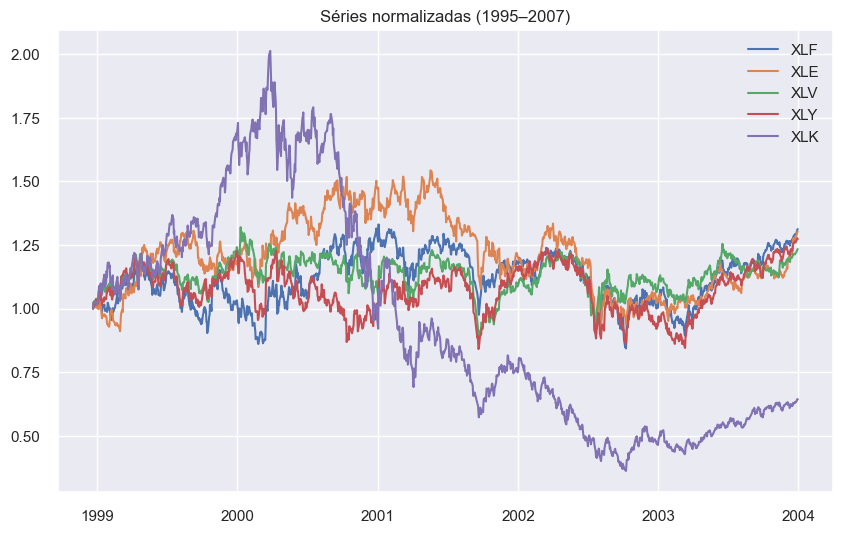

In [5]:
#Importando novamente(o Kernel tinha caido)
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#Para uma primeira mostragem da relação gráfica de contágio, era mais correto utilizar os Indices Setorias e não apenas, as empresas dos setores como Proxys
#Para calcular as covariancias e as correlações, ai sim, utilizaremos as empresas.
tickers = ["XLF", "XLE", "XLV",'XLY','XLK']
start = "1990-01-01"
end = "2003-12-31"
#XLF=Setor Financeiro
#XLE=Energia
#XLV=Saúde
#XLY=Consumo(discricionário)
#XLK=Tecnologia(engloga CISCO e as outras empresas da época, como EBAY, QCOM e outras , que também participaram da euforia,
#Infelizmente, essas empresas não tinham capital na bolsa até 1998 e 1999, se eu ajusta-se o periodo de tempo, perderia a clareza na evolução bolha,
#e o argumento de que bolhas não se formam do dia pra noite, mas sim uma crença viril da capacidade de fluxo de caixa da empresa, muitas vezes de forma iracional.

#Criando o DataFrame com os Indices
prices = pd.DataFrame()
#Função que para cada indice baixa a sua serie historica do periodo.
for t in tickers:
    print("Baixando:", t)
    df = yf.download(t, start=start, end=end, auto_adjust=True, progress=False)

    # pega só a coluna Close
    close = df["Close"]

    # adiciona ao dataframe final
    prices[t] = close

# limpeza mínima(chatooooo)
prices = prices.ffill().dropna(how="all")

# gráfico normalizado
normalized = prices / prices.iloc[0]
#Plotando o gráfico
plt.figure(figsize=(10,6))
plt.plot(normalized)
plt.title("Séries normalizadas (1995–2007)")
plt.legend(normalized.columns)
plt.show()


Baixando: XLF
Baixando: XLE
Baixando: XLV
Baixando: XLY
Baixando: XLK


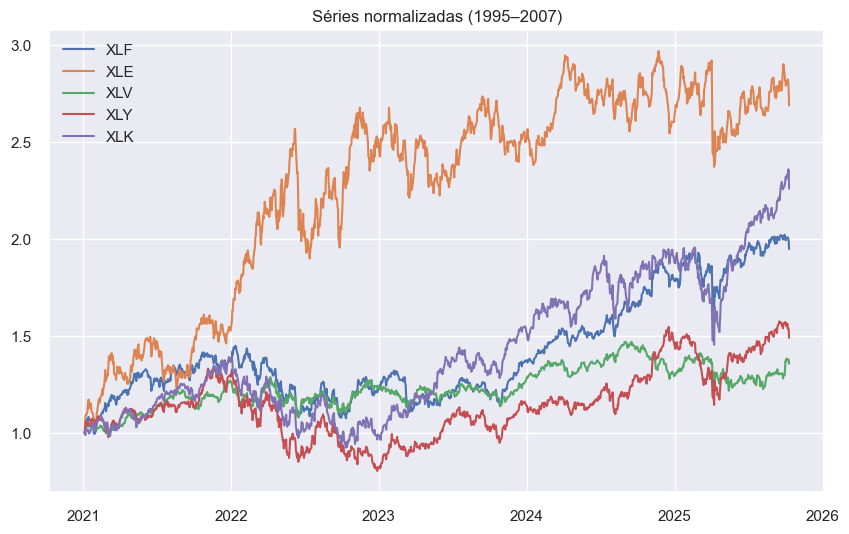

In [6]:
#Importando novamente essa m****
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#Escolhendo os mesmos indices setorias de antes, mas ajustando para a nossa suposta bolha da IA
#Queremos verificar se encontramos um movimento parecido.
#Ajustei para 2021, por que a bolha só faz sentido pós lançamento do ChatGPT em 2022
tickers = ["XLF", "XLE", "XLV",'XLY','XLK']
start = "2021-01-01"
end = "2025-10-12"

#Criando o datafram
prices = pd.DataFrame()

#Para cada indice baixando sua serie historica
for t in tickers:
    print("Baixando:", t)
    df = yf.download(t, start=start, end=end, auto_adjust=True, progress=False)

    # pega só a coluna Close
    close = df["Close"]

    # adiciona ao dataframe final
    prices[t] = close

# limpeza mínima
prices = prices.ffill().dropna(how="all")

# gráfico normalizado
normalized = prices / prices.iloc[0]

#Plotando
plt.figure(figsize=(10,6))
plt.plot(normalized)
plt.title("Séries normalizadas (1995–2007)")
plt.legend(normalized.columns)
plt.show()

#Viu que legal? não teve o mesmo grafico que esperavamos, um XLK esticadasso igual em 2000, mas é possivel ver um
#descolamento se formando...
#Por que caralhos XLE explodiu tanto? Petroleo? Vou investigar...


Baixando: CSCO
Baixando: MSFT
Baixando: ORCL


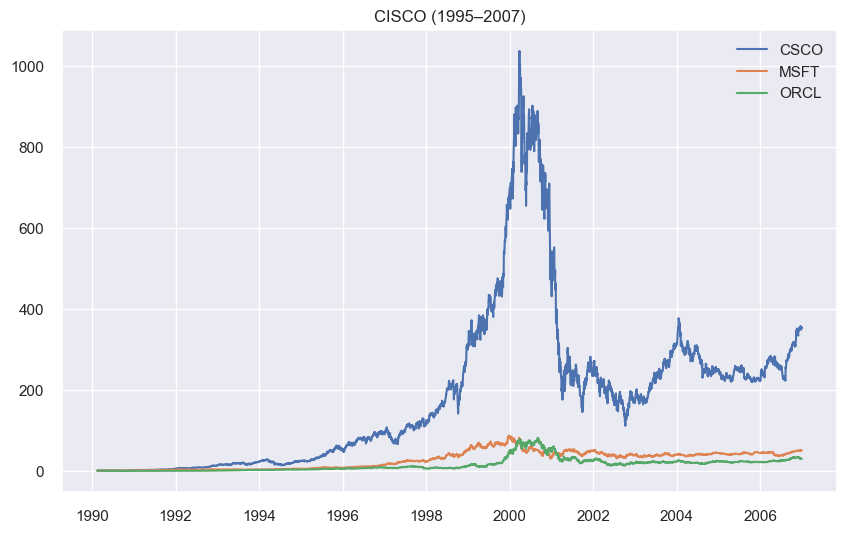

In [7]:
#Importando
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#Agora vamos para as empresas, CSCO, MSFT e OCRL, as outras QCOM, EBAY não tinham as series em 1990, uma pena, 
#mas já da pra ver um resultado legal
tickers = ["CSCO",'MSFT','ORCL']
start = "1990-01-01"
end = "2006-12-31"

#Criando dataframe
prices = pd.DataFrame()

#Para cada empresa, baixando seus preços historicos ajustados
for t in tickers:
    print("Baixando:", t)
    df = yf.download(t, start=start, end=end, auto_adjust=True, progress=False)

    # pega só a coluna Close
    close = df["Close"]

    # adiciona ao dataframe final
    prices[t] = close

# limpeza mínima
prices = prices.ffill().dropna(how="all")

# gráfico normalizado
normalized = prices / prices.iloc[0]

#Plotando grafico
plt.figure(figsize=(10,6))
plt.plot(normalized)
plt.title("CISCO (1995–2007)")
plt.legend(normalized.columns)
plt.show()


Baixando: NVDA
Baixando: AAPL
Baixando: MSFT
Baixando: ORCL
Baixando: PLTR
Baixando: IBM
Baixando: AVGO


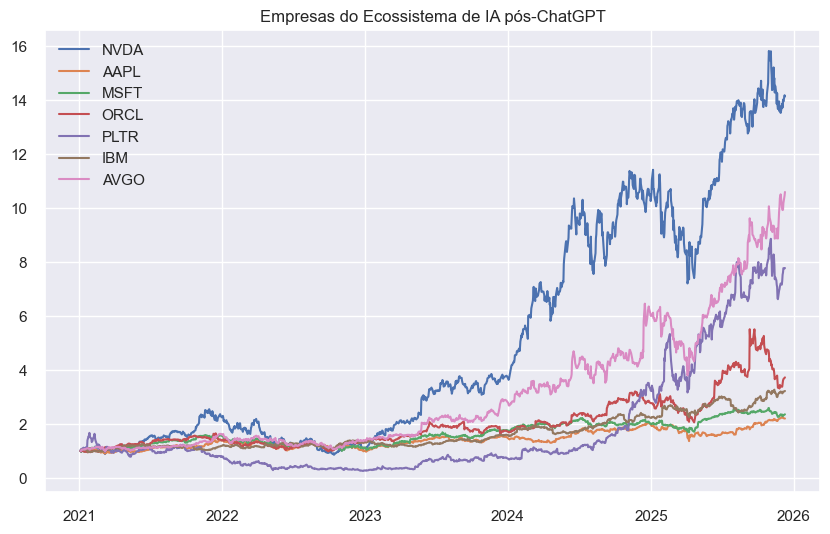

In [8]:
#Importando de novo
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#Mesma coisa, porém selecionei algumas empresas diferentes que fazem parte do ecossistema da IA
#Isso facilita ver que é um movimento conjunto de um novo subsetor dentro do setor de tecnologia, o que dificulta a analise de bolha
#Afinal, os lucros dessas empresas juntas é colossal, em 2024, a NVIDIA teve lucro liquido de U$60Bilhões com crescimento de 126% em relação a 2023.
#Ai a gnt se pergunta, será que elas não valem de fato aquilo que estão sendo negociadas?
tickers = ["NVDA",'AAPL','MSFT','ORCL','PLTR','IBM','AVGO']
start = "2021-01-01"
end = "2025-12-10"

#criando dataframe
prices = pd.DataFrame()
#Para cada empresa, baixando seus preços historicos ajustados
for t in tickers:
    print("Baixando:", t)
    df = yf.download(t, start=start, end=end, auto_adjust=True, progress=False)

    # pega só a coluna Close
    close = df["Close"]

    # adiciona ao dataframe final
    prices[t] = close

# limpeza mínima
prices = prices.ffill().dropna(how="all")

# gráfico normalizado
normalized = prices / prices.iloc[0]
#Plotando o grafico
plt.figure(figsize=(10,6))
plt.plot(normalized)
plt.title("Empresas do Ecossistema de IA pós-ChatGPT")
plt.legend(normalized.columns)
plt.show()


Tipo csco: <class 'pandas.core.series.Series'>
csco head:
Date
1995-01-03    1.233265
1995-01-04    1.242301
1995-01-05    1.233265
1995-01-06    1.233265
1995-01-09    1.260370
Name: (Close, CSCO), dtype: float64

Tipo market: <class 'pandas.core.series.Series'>
market head:
Date
1995-01-03    459.109985
1995-01-04    460.709991
1995-01-05    460.339996
1995-01-06    460.679993
1995-01-09    460.829987
Name: (Close, ^GSPC), dtype: float64

Pico (csco idxmax): 2000-03-27 00:00:00 -> 2000-03-27

Retorno acumulado CSCO desde 1995-01-03 até 2000-03-27: 4123.08%
Retorno acumulado ^GSPC desde 1995-01-03 até 2000-03-27: 231.92%


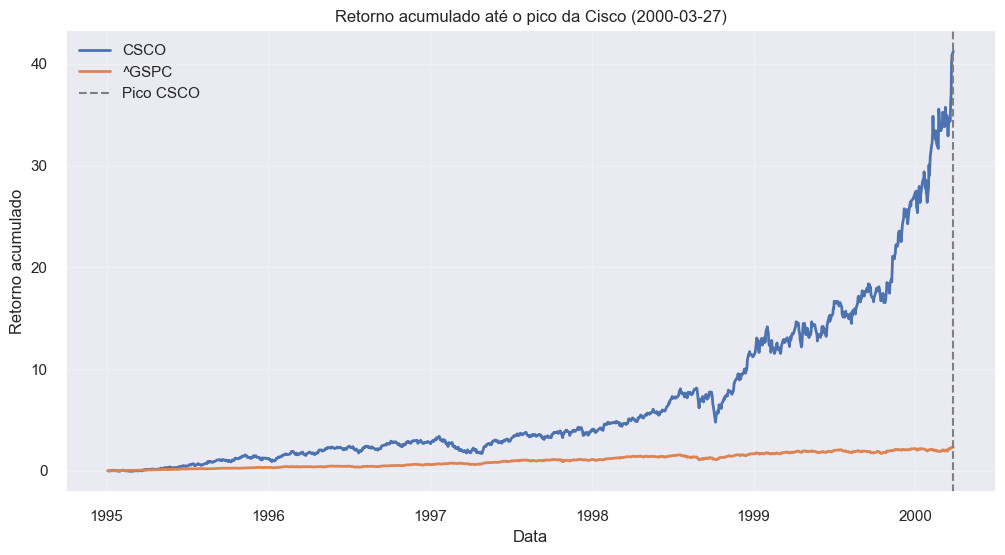

In [9]:
#Aqui começa a parte mais chata, calculo do retorno acumulado até o topo da bolha dotcom.
# Este código baixa os dados, garante o formato correto, encontra a data do pico,
# alinha a data do mercado e calcula o retorno acumulado até essa data.
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Função que sempre retorna uma Series com preços de fechamento.
# Isso é para evitar erros posteriores (como idxmax retornar Series, colunas faltando e tals).

def get_close_series(ticker, start, end):
    """
    Baixa preços e retorna UMA pandas.Series com preços de fechamento ajustados (ou close).
    Funciona para DataFrame simples, MultiIndex e Series.
    """
    df = yf.download(ticker, start=start, end=end, auto_adjust=True, progress=False)
    
    # Verifica se os dados vieram vazios — evita trabalhar com objetos inválidos
    if df is None or (isinstance(df, (pd.DataFrame, pd.Series)) and df.empty):
        raise ValueError(f"Sem dados para {ticker} no período {start} - {end}")

    # Caso 1 — df é Series (raro), já está no formato desejado.
    if isinstance(df, pd.Series):
        s = df.dropna()
        # se for uma série com índice de colunas (improvável) retorna direto
        return s

    # Caso 2 — df é DataFrame (o normal).
    # Esse bloco lida com DataFrames simples e MultiIndex.
    if isinstance(df, pd.DataFrame):
        # 1) MultiIndex (colunas tuple):  Caso 2 — df é DataFrame (o normal).
        # Devemos localizar a subcoluna 'Close' ou 'Adj Close'.
        if isinstance(df.columns, pd.MultiIndex):
            # normalizar níveis para checar
            matches = [col for col in df.columns if len(col) > 1 and str(col[1]).strip().lower() in ("close", "adj close", "adjclose")]
            if matches:
                s = df[matches[0]]
                # se por algum CARALHO de motivo ainda for DataFrame, pega a primeira coluna
                if isinstance(s, pd.DataFrame):
                    s = s.iloc[:, 0]
                return s.dropna()
            # Procuramos qualquer coluna cujo segundo nível seja 'Close'
            for col in df.columns:
                if str(col[1]).strip().lower() in ("close", "adj close", "adjclose"):
                    s = df[col]
                    if isinstance(s, pd.DataFrame):
                        s = s.iloc[:,0]
                    return s.dropna()
             # Último fallback: pega a primeira subcoluna disponível
            first_col = df.columns[0]
            s = df[first_col]
            if isinstance(s, pd.DataFrame):
                s = s.iloc[:, 0]
            return s.dropna()

        # 2) DataFrame normal (colunas planas)
        # Procuramos 'Close', depois 'Adj Close'. Senão usamos a primeira coluna.
        if "Close" in df.columns:
            return df["Close"].dropna()
        if "Adj Close" in df.columns:
            return df["Adj Close"].dropna()
        # fallback: primeira coluna
        return df.iloc[:, 0].dropna()

    # se chegou aqui, tentar converter pra Series(que inferno)
    return pd.Series(df).dropna()


#Parâmetros
#Vamo calcular o retorno da SP500 e da CSCO no periodo e ver o quão descolado, estava os retornos.
ticker_stock = "CSCO"
ticker_market = "^GSPC"
start = "1995-01-01"
end = "2006-12-31"

# Baixar séries que criamos pela função
csco = get_close_series(ticker_stock, start, end)
market = get_close_series(ticker_market, start, end)

# diagnóstico curto (pra ver se não deu merda na função de transformar dataframe em series)
print("Tipo csco:", type(csco))
print("csco head:")
print(csco.head())
print("\nTipo market:", type(market))
print("market head:")
print(market.head())

# Encontrar pico da Cisco (máxima) 
peak_date = csco.idxmax()
# garantir Timestamp scalar
peak_date = pd.to_datetime(peak_date)
print("\nPico (csco idxmax):", peak_date, "->", peak_date.date())

# Ajustar data do mercado (pregão anterior igual), apenas para verificar se está tudo certo com as datas do pregão no dia da máxima 
if peak_date in market.index:
    market_date = peak_date
else:
    pos = market.index.get_indexer([peak_date], method='ffill')[0]
    if pos == -1:
        # usar primeira data disponível no market
        market_date = market.index[0]
        print("Aviso: mercado não tem pregão anterior ao pico; usando primeira data do mercado:", market_date.date())
    else:
        market_date = market.index[pos]
        if market_date != peak_date:
            print("Mercado não tinha pregão exatamente no pico; usando pregão anterior:", market_date.date())

#  Calcular retorno acumulado (desde primeiro preço disponível de cada série)
cisco_start = csco.iloc[0]
market_start = market.iloc[0]

# Preços no pico
cisco_price_at_peak = csco.loc[peak_date]     
market_price_at_peak = market.loc[market_date]

# Fórmula: retorno = (preço_final / preço_inicial) - 1
cisco_ret = (cisco_price_at_peak / cisco_start) - 1
market_ret = (market_price_at_peak / market_start) - 1

print(f"\nRetorno acumulado CSCO desde {csco.index[0].date()} até {peak_date.date()}: {cisco_ret:.2%}")
print(f"Retorno acumulado {ticker_market} desde {market.index[0].date()} até {market_date.date()}: {market_ret:.2%}")

#Plot retorno acumulado até o pico 

# Calculamos retornos diários (pct_change)
returns_csco = csco.pct_change().dropna()
returns_market = market.pct_change().dropna()


# Convertendo para retorno acumulado: (1+r).cumprod() - 1
cum_csco = (1 + returns_csco).cumprod() - 1
cum_market = (1 + returns_market).cumprod() - 1

# Só plotamos até o menor limite entre as séries
end_plot = min(peak_date, market_date)

# Gráfico
plt.figure(figsize=(12,6))
plt.plot(cum_csco.loc[:end_plot].index, cum_csco.loc[:end_plot].values, label="CSCO", linewidth=2)
plt.plot(cum_market.loc[:end_plot].index, cum_market.loc[:end_plot].values, label=ticker_market, linewidth=2)
# Linha vertical no pico da Cisco
plt.axvline(peak_date, color='grey', linestyle='--', label='Pico CSCO')
plt.title(f"Retorno acumulado até o pico da Cisco ({peak_date.date()})")
plt.ylabel("Retorno acumulado")
plt.xlabel("Data")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


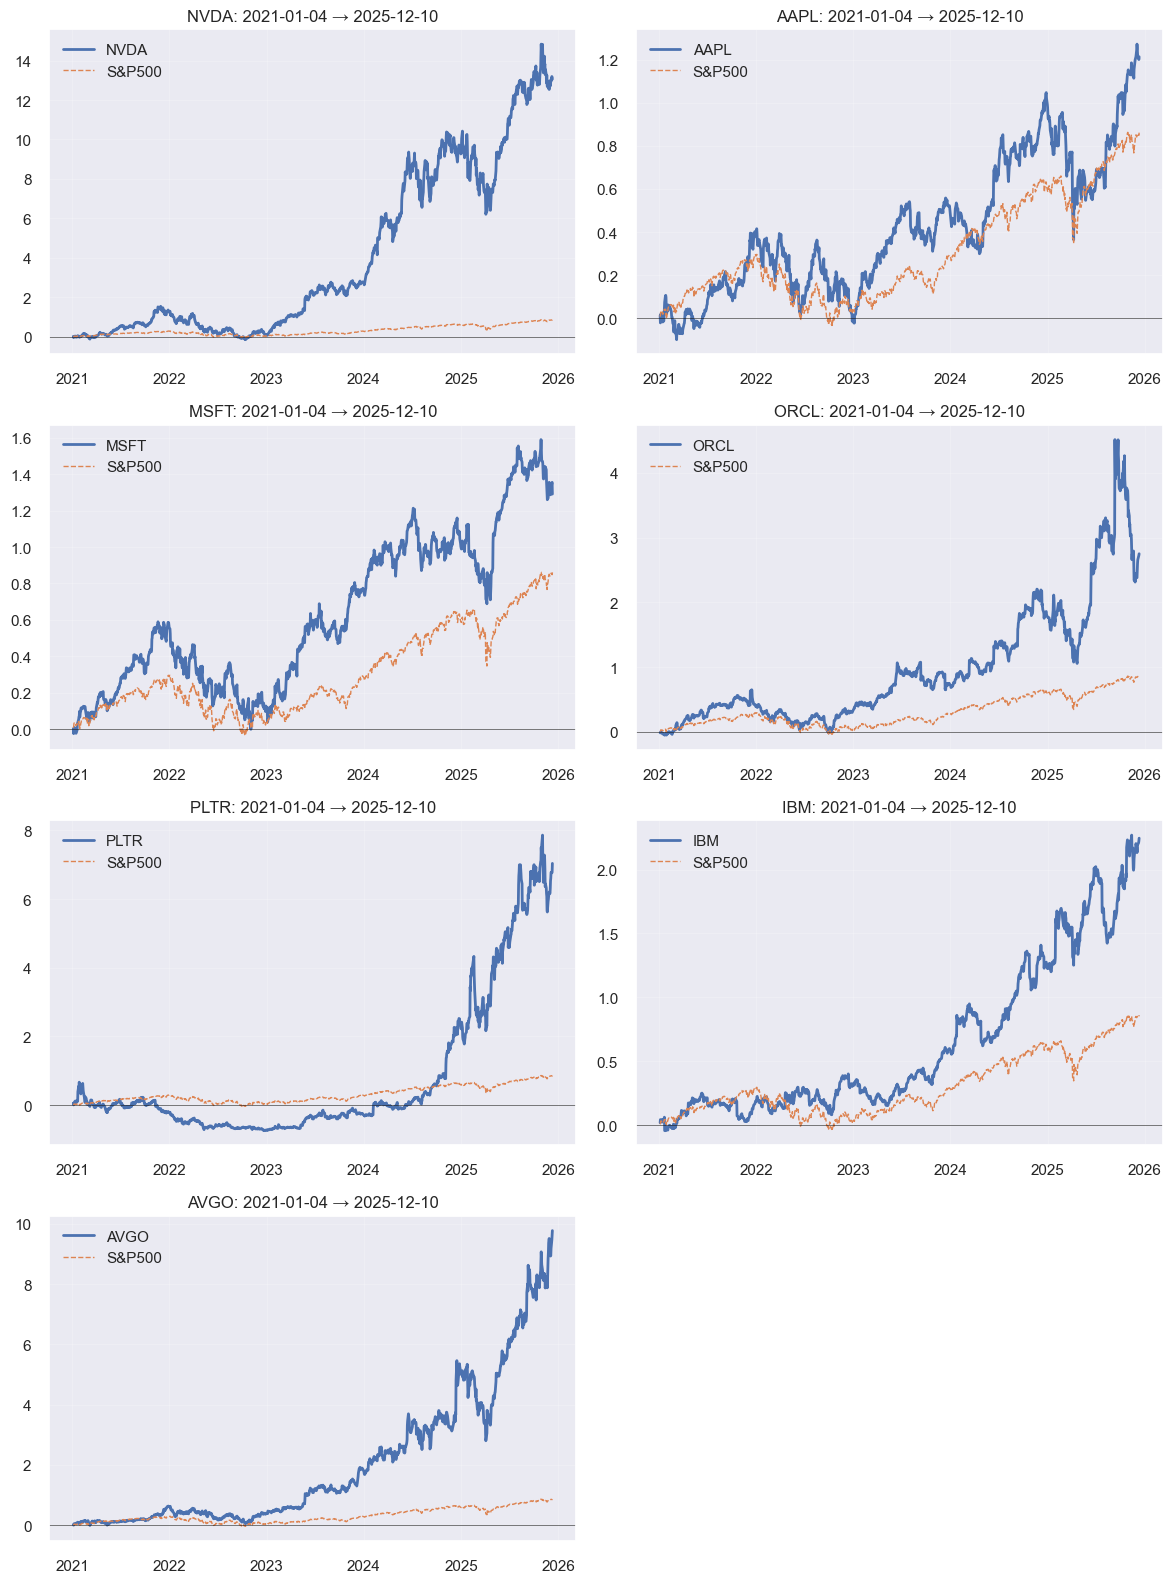

,Ticker,Stock_start,Stock_end,Stock_return_%,Market_start_for_stock,Market_end_for_stock,Market_return_%
0,NVDA,2021-01-04,2025-12-10,1305.40%,2021-01-04,2025-12-10,86.09%
1,AAPL,2021-01-04,2025-12-10,121.30%,2021-01-04,2025-12-10,86.09%
2,MSFT,2021-01-04,2025-12-10,129.11%,2021-01-04,2025-12-10,86.09%
3,ORCL,2021-01-04,2025-12-10,275.04%,2021-01-04,2025-12-10,86.09%
4,PLTR,2021-01-04,2025-12-10,704.07%,2021-01-04,2025-12-10,86.09%
5,IBM,2021-01-04,2025-12-10,224.56%,2021-01-04,2025-12-10,86.09%
6,AVGO,2021-01-04,2025-12-10,977.51%,2021-01-04,2025-12-10,86.09%


In [10]:
#retorno acumulado das empresas do "boom de IA" vs S&P500
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import math

# função para sempre retornar uma pandas.Series, é a mesma função de antes, sem estresse.
def get_close_series(ticker, start, end):
    df = yf.download(ticker, start=start, end=end, auto_adjust=True, progress=False)
    if df is None or (hasattr(df, "empty") and df.empty):
        raise ValueError(f"Sem dados para {ticker} no período {start} - {end}")
    if isinstance(df, pd.Series):
        return df.dropna()
    if isinstance(df, pd.DataFrame):
        # MultiIndex: procurar subcoluna Close/Adj Close
        if isinstance(df.columns, pd.MultiIndex):
            matches = [col for col in df.columns if len(col) > 1 and str(col[1]).strip().lower() in ("close", "adj close", "adjclose")]
            if matches:
                s = df[matches[0]]
                if isinstance(s, pd.DataFrame):
                    s = s.iloc[:,0]
                return s.dropna()
            # fallback: primeira subcoluna
            s = df[df.columns[0]]
            if isinstance(s, pd.DataFrame):
                s = s.iloc[:,0]
            return s.dropna()
        # DataFrame simples
        if "Close" in df.columns:
            return df["Close"].dropna()
        if "Adj Close" in df.columns:
            return df["Adj Close"].dropna()
        # fallback: primeira coluna
        return df.iloc[:,0].dropna()
    # fallback final
    return pd.Series(df).dropna()

# parâmetros
tickers = ["NVDA","AAPL","MSFT","ORCL","PLTR","IBM","AVGO"]
market_ticker = "^GSPC"
start = "2021-01-01"   
end = None             # None = até a última data disponível(curiosamente, HOJE)

# baixar série do mercado(SP&500) usando a função demoniaca, no caso vai funcionar como Benchmark
market = get_close_series(market_ticker, start, end)

results = []

# preparar figura de subplots (n linhas conforme número de tickers, que no caso são 7)
n = len(tickers)
cols = 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows), squeeze=False)
axes_flat = axes.flatten()

#Loop Principal: para cada ticker
for i, t in enumerate(tickers):
    ax = axes_flat[i]  # eixo correspondente ao subplot
    try:
        #Baixando a série da ação (sempre retorna Series)
        s = get_close_series(t, start, end)
    except Exception as e:
        # Se ocorrer erro no download, imprimir o aviso
        print(f"Erro ao baixar {t}: {e}")
        continue

    # intervalo da empresa
    s_start = s.index[0]
    s_end = s.index[-1]

    # localizar preços do mercado para o mesmo intervalo (usar pregões anteriores se necessário)
    # posição inicial do mercado (<= s_start)
    pos_start = market.index.get_indexer([s_start], method='ffill')[0]
    if pos_start == -1:
        # se não existir pregão anterior, usar o primeiro do market
        pos_start = 0
    market_start_date = market.index[pos_start]

    # posição final do mercado (<= s_end)
    pos_end = market.index.get_indexer([s_end], method='ffill')[0]
    if pos_end == -1:
        pos_end = len(market) - 1
    market_end_date = market.index[pos_end]

    #Preços iniciais e finais para cálculo do retorno acumulado
    stock_start_price = s.iloc[0]
    stock_end_price = s.iloc[-1]
    market_start_price = market.iloc[pos_start]
    market_end_price = market.iloc[pos_end]

    #Cálculo do retorno acumulado simples: (P_end / P_start) - 1
    stock_ret = (stock_end_price / stock_start_price) - 1
    market_ret = (market_end_price / market_start_price) - 1


     #Armazenar os resultados numa tabela final
    results.append({
        "Ticker": t,
        "Stock_start": s_start.date(),
        "Stock_end": s_end.date(),
        "Stock_return": stock_ret,
        "Market_start_for_stock": market_start_date.date(),
        "Market_end_for_stock": market_end_date.date(),
        "Market_return_on_same_period": market_ret
    })

    # construir séries de retorno acumulado alinhadas para plot
    stock_cum = (1 + s.pct_change().dropna()).cumprod() - 1
    # Alinhar o benchmark para as mesmas datas da ação usando reindex + ffill
    market_for_plot = market.reindex(s.index, method='ffill')
    market_cum_for_plot = (1 + market_for_plot.pct_change().dropna()).cumprod() - 1

    # Plotar no subplot: ação (linha sólida) vs S&P500 (linha tracejada)
    ax.plot(stock_cum.index, stock_cum.values, label=t, linewidth=2)
    ax.plot(market_cum_for_plot.index, market_cum_for_plot.values, label="S&P500", linewidth=1, linestyle='--')
    ax.set_title(f"{t}: {s_start.date()} → {s_end.date()}")
    ax.axhline(0, color='k', linewidth=0.4)
    ax.legend()
    ax.grid(alpha=0.2)

# Se houver subplots sobrando (quando n não é par), esconder os ax vazios
for j in range(i+1, len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.tight_layout()
plt.show()

#tabela resumida
res_df = pd.DataFrame(results)
# formatar percentuais
res_df["Stock_return_%"] = (res_df["Stock_return"] * 100).map(lambda x: f"{x:.2f}%")
res_df["Market_return_%"] = (res_df["Market_return_on_same_period"] * 100).map(lambda x: f"{x:.2f}%")
display(res_df[["Ticker","Stock_start","Stock_end","Stock_return_%","Market_start_for_stock","Market_end_for_stock","Market_return_%"]])
